# random walk simulation, diffusion

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


pseudo code

for 
choice how many go to left, right, and stay
adjust number
visulazation



In [7]:
def choose_left_right(number):
    """label atoms with 0, -1, 1, meaning no move, move left, move right"""
    label = np.random.choice([0, -1, 1], number, p=[0.8,0.1,0.1])
    left_no = len(label[label == -1])
    right_no = len(label[label == 1])
    return (left_no, right_no)

def c_time_steps(n):
    # inital
    lo = int(1e5)
    hi = lo * 10
    c = np.array([hi]*10 + [lo]*10)
    c_lis = []
    c_lis.append(c)
    c = np.array([hi]*10 + [lo]*10)
    
    # step
    if n == 0:
        None
    else:
        for i in range(n):
            left_lis = []
            right_lis = []
            for v in c:
                left_no, right_no = choose_left_right(v)
                left_lis.append(left_no)
                right_lis.append(right_no)
            # update c
            # no move
            c = c - np.array(left_lis) - np.array(right_lis)
            # add left move
            c[0:-1] = c[0:-1] + np.array(left_lis)[1:]
            c[0] = c[0] + np.array(left_lis)[0]
            # add right move
            c[1:] = c[1:] + np.array(right_lis)[0:-1]
            c[-1] = c[-1] + np.array(right_lis)[-1]
            c_lis.append(c)
    return c_lis


In [8]:
# compute for n steps
n=50
c_lis = c_time_steps(n)
x_grid = list(range(len(c_lis[0])))

<IPython.core.display.Javascript object>


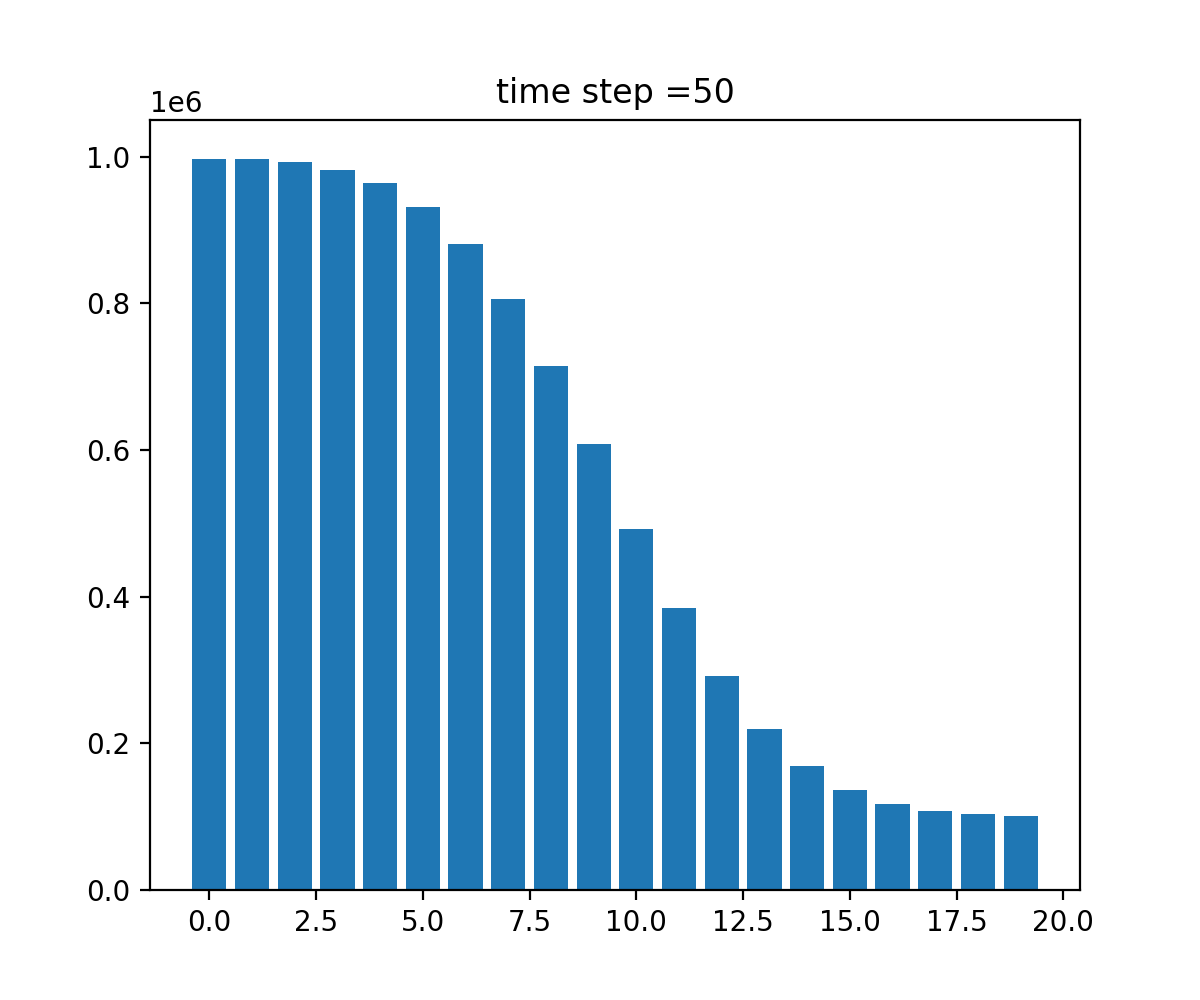

interactive(children=(IntSlider(value=0, description='time_step', layout=Layout(height='40px', width='500px'),…

<function __main__.update_plot(time_step)>

In [9]:
# interactive plot
step = 0
fig, ax = plt.subplots(figsize=(6,5))
bar = plt.bar(x_grid, c_lis[step])
plt.title(f"time step ={step}")
plt.show()

def update_plot(time_step):
    for rect, grid_no in zip(bar, x_grid):
        rect.set_height(c_lis[time_step][grid_no])
        plt.title(f"time step ={time_step}")
        fig.canvas.draw()
        fig.canvas.flush_events()

import ipywidgets as widgets

layout = widgets.Layout(width="500px", height="40px")

widgets.interact(
            update_plot,
            time_step=widgets.IntSlider(
                min=0,
                max=n,
                step=1,
                value=0,
                continuous_update=True,
                layout=layout,
            ))
